# Brolly Coding Challenge

The point of this challenge was to detect the change in insurance prices in relation to the amount bicycle thefts. The conditions are thus:

1) Each crime accounts for a £1 increase in the price. 

2) The price is cumulative so, if last month's price is £3 and there are two incidents per month, the price would go up £2 per month as follows: £3, £5, £7...

3) For any month when the number of incidents is half or less than half the number of incidents in the previous month, the price goes down £1.

4) The initial starting price is £1

## Preprocessing the Data

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import glob as glob
import sys
import os
import itertools

In order to solve this problem, we first need to create a dataframe that has all of the police data on here. In order to accomplish that, we first have to create a list of all of the directories in all of the folders

In [176]:
# Navigate to the correct directory
os.chdir('/Users/nigel.hussain/Downloads/Police_Data')




# Iterate through all of the files and create a list of list of all of the filenames (grouped by the date)
file_dir = []
for rootdir, dirs, files in os.walk(os.getcwd()):  
    for filename in files:
        file_dir.append(os.path.join(rootdir, filename))


        

# Remove 'DS_Store' that has nothing to do with the data        
file_dir.pop(0) 



# Sanity Check
print(file_dir)

['/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-avon-and-somerset-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-bedfordshire-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-btp-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-cambridgeshire-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-cheshire-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-city-of-london-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-cleveland-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-cumbria-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-derbyshire-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-devon-and-cornwall-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-dorset-street.csv', '/Users/nigel.hussain/Downloads/Police_Data/2015-12/2015-12-durham-

Then, we have to actually create the dataframe, which seems to have 19215765 rows

In [6]:
dfs_police_data = [pd.read_csv(f) for f in file_dir]
police_data = pd.concat(dfs_police_data)
police_data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509930,51.410873,On or near Ludlow Close,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,fa83df15d78c4d8439826d3743b987345eef5b8ff723db...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509930,51.410873,On or near Ludlow Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
2,af441ad3f3b284a342c0d8c795c2966a88b1a0ccd7767e...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511927,51.409435,On or near Harlech Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
3,b287b2967ba59f600618e3a87f5d6d86234d9b1c4a481e...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Court result unavailable,NaN
4,ba300f390d586d955c0fb82b5ac5a742e9c71fa5cdc71a...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.512773,51.411751,On or near Westfield Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
5,NaN,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.499922,51.417373,On or near Further/Higher Educational Building,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
6,NaN,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
7,NaN,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN
8,115cc3b9979c31c769b71116651317d09170ba502aa1f9...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Bicycle theft,Status update unavailable,NaN
9,c03d919d6f1342554b84fcb29b099eb424f4135c390e54...,2015-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497767,51.420232,On or near Chandos Road,E01014400,Bath and North East Somerset 001B,Criminal damage and arson,Status update unavailable,NaN


We then have to create a list of dataframes, with each element of the list corresponding to the date of the folder. This was done with the help of the groupby function and most importantly, the elements are all grouped in chronological order.

In [177]:
# Create a list of dataframes
list_of_police_df = []
for _, g in police_data.groupby(police_data['Month']):
    list_of_police_df.append(g)

# All of the crimes for 2016-01
print(list_of_police_df[1]) # You can replace [1] with the corresponding index to get the correct date

                                               Crime ID    Month  \
0                                                   NaN  2016-01   
1                                                   NaN  2016-01   
2     2163e1bf85d197a93f9c1c6daeb113ad0e0fbd3a8b603f...  2016-01   
3     74f4fc07b60510a8862f77180de1c8bf1a0755105ec494...  2016-01   
4     6c3dbed2ea67ad837bee1229ccf3951bd48f42e22421fe...  2016-01   
5     c12d9c76797195b306f037573eb0f8dde88e21c930d1a1...  2016-01   
6     50a8068b725028cd5565dd9eebccf28810481dd36995a1...  2016-01   
7     ddb9175993a3c2e0a3c2aae8ff92c969f14acbe3e38579...  2016-01   
8     4216681d75bb0f022839c41935fa68ad4ef32640f0e4df...  2016-01   
9     339c4d042124574fc76728cf5c85d0d7c52691813413c2...  2016-01   
10    53d69b5fec8c84434f31170746a62f34c219fd736bdd8f...  2016-01   
11                                                  NaN  2016-01   
12                                                  NaN  2016-01   
13                                              

Now we have to count the number of bicycle incidents per month

In [190]:
def bicycle_theft_count(dataframe_column):
    '''Returns the number of bicycle thefts each month'''
    count = 0
    for value in dataframe_column:
        if value == 'Bicycle theft':
            count += 1
        else:
            continue
    return(count)

# Checking work
bicycle_theft_count(list_of_police_df[2]['Crime type'])

4819

In [189]:
# Sanity Check
list_of_police_df[2]['Crime type'].value_counts()

Anti-social behaviour           126774
Violence and sexual offences     89779
Criminal damage and arson        44405
Other theft                      36872
Burglary                         33532
Vehicle crime                    29906
Shoplifting                      29207
Public order                     16002
Drugs                            11323
Theft from the person             6505
Other crime                       5777
Bicycle theft                     4819
Robbery                           4132
Possession of weapons             2208
Name: Crime type, dtype: int64

As we can see, the function yields the correct number. Now we can get the number of bicycle thefts per month by iterating through the list of dataframes

In [192]:
bicycle_thefts = []
for i, dataframe in enumerate(list_of_police_df):
    count = bicycle_theft_count(list_of_police_df[i]['Crime type'])
    bicycle_thefts.append(count)

# Sanity Check
bicycle_thefts

[5320,
 5362,
 4819,
 5537,
 6264,
 7643,
 7876,
 8890,
 9565,
 9306,
 10671,
 8411,
 6236,
 6211,
 6079,
 7578,
 8282,
 9628,
 10113,
 11044,
 10436,
 10101,
 10171,
 8594,
 5258,
 5952,
 5498,
 5583,
 6648,
 8533,
 9655,
 10757,
 10092,
 9882,
 10148,
 7881]

Now we have to create a function that will most accurately reflect the policies. However, for the insurance count function we have to include the first condition to include the initial insurance change. Then we can implement the  conditions, which are all outlined at the start of the article. I used 1 pound as the initial starting price. For example, since there were 5320 bicycle related crimes this month, then the final insurance price will be 5321 pounds

In [215]:
insurance_cost = []
def insurance_change(list):
    for i, count in enumerate(list):
        if i == 0:
            insurance_cost.append(1 + list[i])
        elif i < len(list):
            if list[i] <= (.5*(list[i-1])):
                count -= 1
            else:
                insurance_cost.append(insurance_cost[-1] + (list[i]))
                
insurance_change(bicycle_thefts)

print(insurance_cost)

[5321, 10683, 15502, 21039, 27303, 34946, 42822, 51712, 61277, 70583, 81254, 89665, 95901, 102112, 108191, 115769, 124051, 133679, 143792, 154836, 165272, 175373, 185544, 194138, 199396, 205348, 210846, 216429, 223077, 231610, 241265, 252022, 262114, 271996, 282144, 290025]


Now we have to get a list of dates so we can match the price to the insurance cost. This is accomplisehed by getting a list of the folders in the police data directory, which just so happen to be named after the month.

In [216]:
# Create a list of dates
dates = []

for folder in os.listdir('/Users/nigel.hussain/Downloads/Police_Data'):
    dates.append(os.path.splitext(folder)[0])

del(dates[0])

# dates.append
print(dates)

['2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11']


To make things easier, we will create a dataframe which matches the dates to the insurance cost

In [217]:
# Create dataframe of dates and costs to retrieve the 
insurance_cost_df = pd.DataFrame({'insurance cost (pounds)': insurance_cost,
                                 'dates': dates
                                 })
insurance_cost_df

,insurance cost (pounds),dates
0,5321,2015-12
1,10683,2016-01
2,15502,2016-02
3,21039,2016-03
4,27303,2016-04
5,34946,2016-05
6,42822,2016-06
7,51712,2016-07
8,61277,2016-08
9,70583,2016-09


We then import the graphing dependencies

In [218]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We then graph the data in both bar graph and scatterplot to visualise the data, and it seems that the bar graph is the best way to visualise the data.

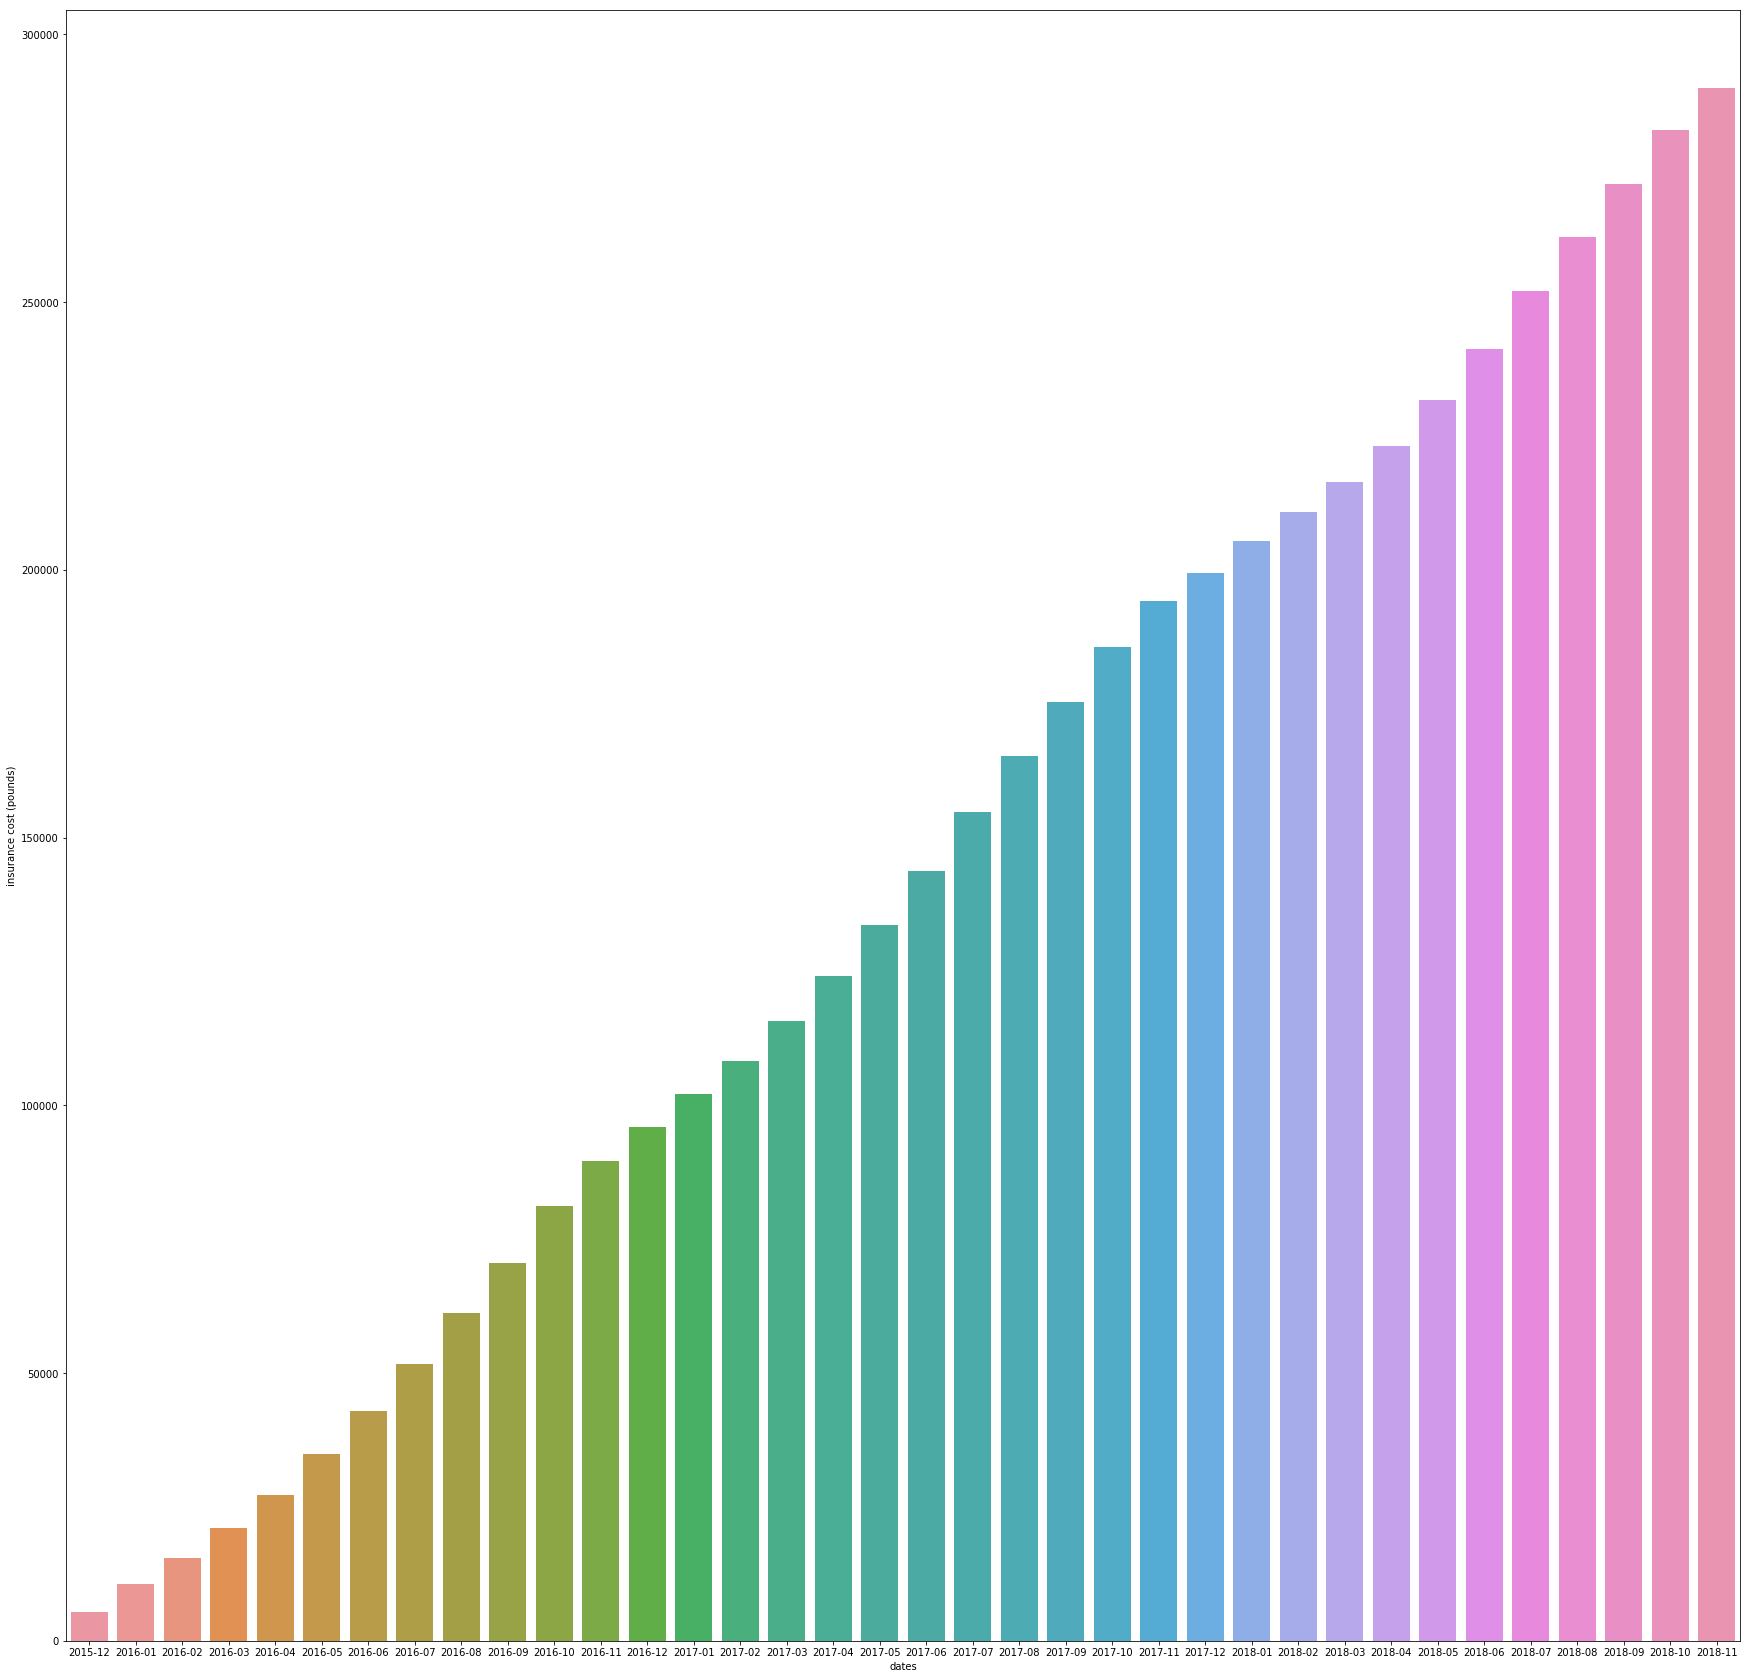

In [222]:
plt.figure(figsize=(30,30))
ax = sns.barplot(x="dates", y="insurance cost (pounds)", data=insurance_cost_df)

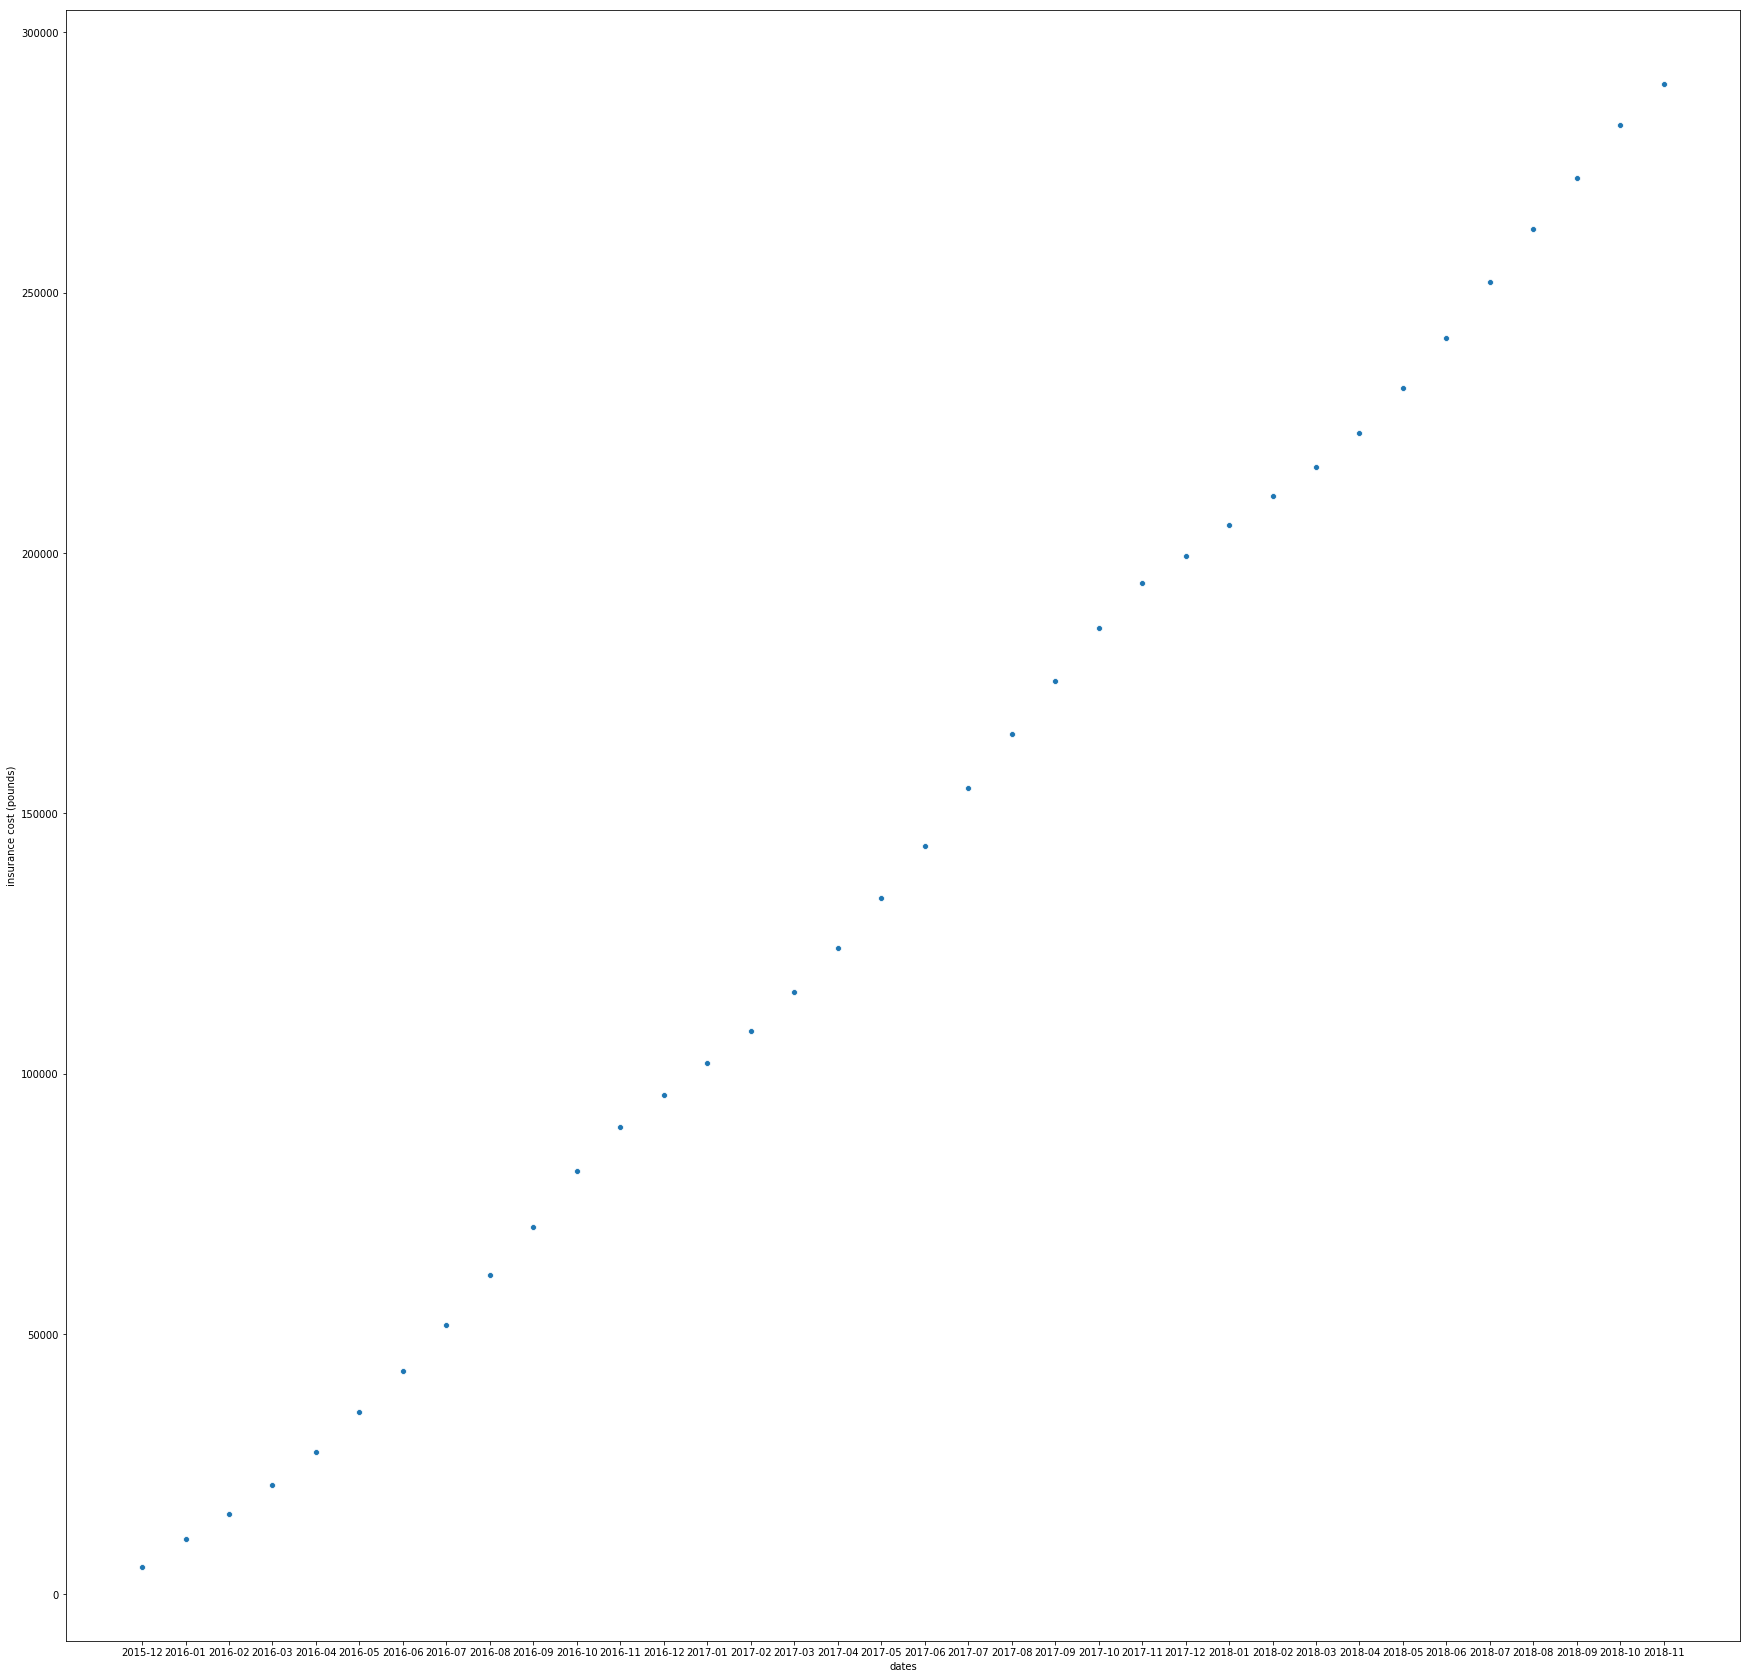

In [220]:
plt.figure(figsize=(30,30))
ax = sns.scatterplot(x="dates", y="insurance cost (pounds)", data=insurance_cost_df)

The amount of bicycle thefts and the skyrocketing insurance costs indicate that we probably should avoid purchasing bicycles in this region and should avoid purchasing bicycle insurance from an insurance company that uses this policy.